# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [2]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [3]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


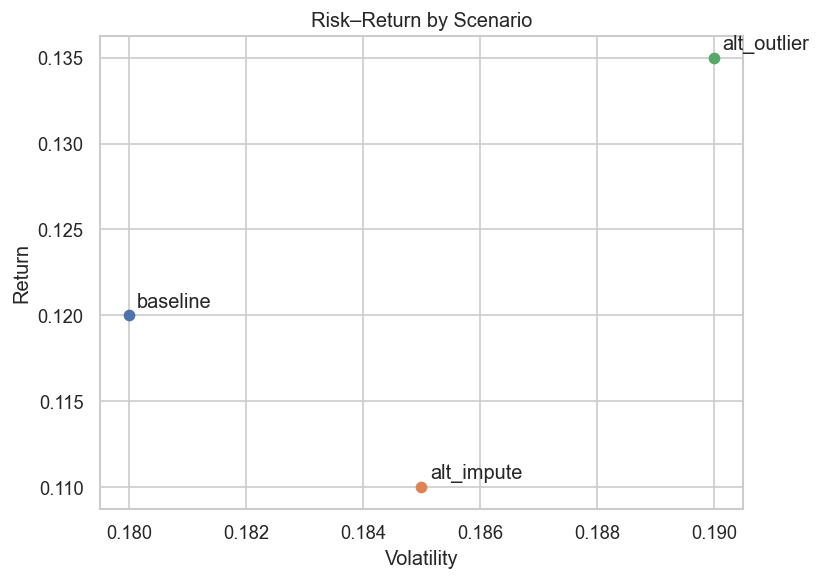

In [5]:
plt.figure(figsize=(7,5))
for _, r in df.iterrows():
    plt.scatter(r['volatility'], r['return'], label=r['scenario'])
    plt.annotate(r['scenario'], (r['volatility'], r['return']), xytext=(5,5), textcoords='offset points')
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility'); plt.ylabel('Return')
savefig('risk_return.png'); plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


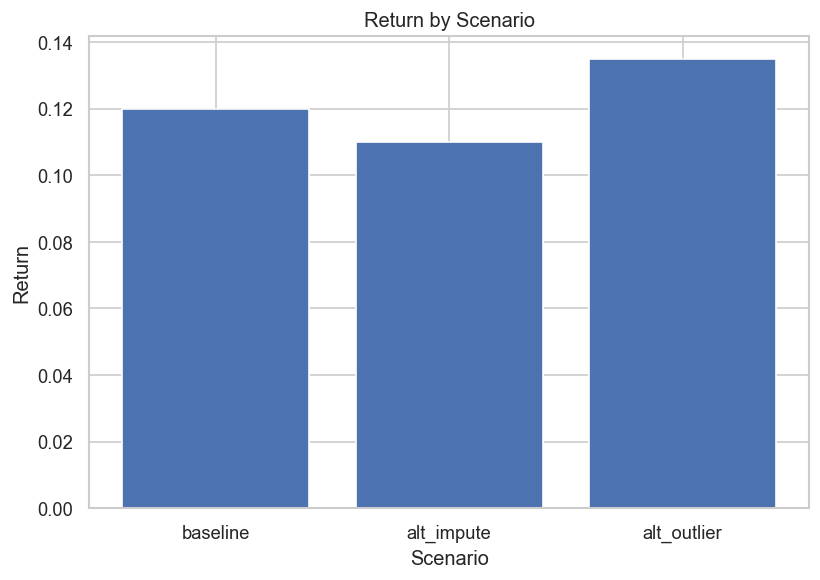

In [6]:
plt.figure(figsize=(7,5))
x = np.arange(len(df))
plt.bar(x, df['return'].values)
plt.xticks(x, df['scenario'].values)
plt.title('Return by Scenario')
plt.xlabel('Scenario'); plt.ylabel('Return')
savefig('return_by_scenario.png'); plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


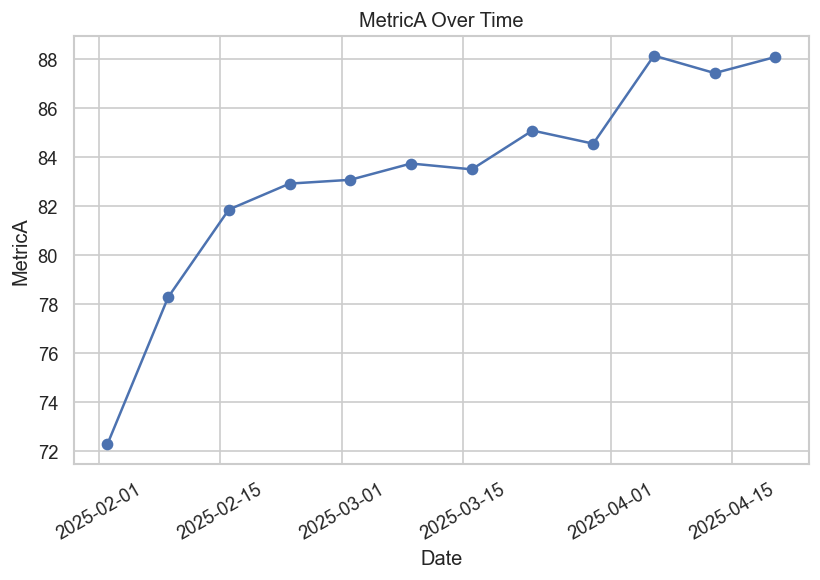

In [7]:
dates = pd.date_range('2025-02-01', periods=12, freq='W')
metricA = pd.Series(70 + np.cumsum(np.random.normal(0, 2.5, len(dates))), index=dates)

plt.figure(figsize=(7,5))
plt.plot(metricA.index, metricA.values, marker='o')
plt.title('MetricA Over Time')
plt.xlabel('Date'); plt.ylabel('MetricA')
plt.xticks(rotation=30)
savefig('metricA_over_time.png'); plt.show()

## Sensitivity Analysis / Assumptions Table

C:\Users\Tracy\AppData\Local\Temp\ipykernel_30060\3252938702.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  baseline_return = float(df.loc[df['scenario']=='baseline','return'])


,Scenario,Assumption,Value,Return,Volatility,Delta_Return
0,baseline,imputation,median,0.120,0.180,0.000
1,alt_impute,imputation,mean,0.110,0.185,-0.010
2,alt_outlier,outlier_rule,3sigma,0.135,0.190,0.015


Saved tornado_assumptions.png


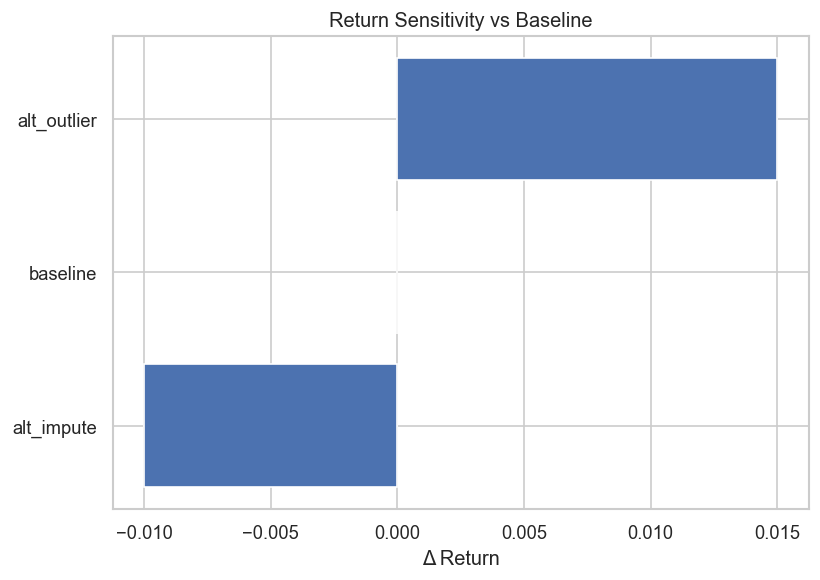

In [8]:
baseline_return = float(df.loc[df['scenario']=='baseline','return'])
assumptions = pd.DataFrame({
    'Scenario': df['scenario'],
    'Assumption': df['assumption'],
    'Value': df['value'],
    'Return': df['return'],
    'Volatility': df['volatility']
})
assumptions['Delta_Return'] = assumptions['Return'] - baseline_return
display(assumptions)

# Tornado-style horizontal bars of Δ vs baseline
sens = assumptions.sort_values('Delta_Return')
plt.figure(figsize=(7,5))
ypos = np.arange(len(sens))
plt.barh(ypos, sens['Delta_Return'].values)
plt.yticks(ypos, sens['Scenario'].values)
plt.title('Return Sensitivity vs Baseline')
plt.xlabel('Δ Return')
savefig('tornado_assumptions.png'); plt.show()

## Interpretations / Takeaways

- **Chart 1 takeaway:** Alt scenarios cluster near baseline; **alt_outlier** improves return with slightly higher volatility.
- **Chart 2 takeaway:** **alt_outlier** outperforms; **alt_impute** underperforms baseline.
- **Chart 3 takeaway:** MetricA trends steadily; no abrupt breaks.
- **Sensitivity:** Outlier rule is the most influential assumption; imputation choice smaller impact.

## Decision Implications
- **Assumptions:** Stable data definitions; median vs mean imputation; 3σ outlier handling.
- **Risks:** Regime shifts and data quality drift (missing/outliers) can move returns and volatility.
- **Mitigations:** Monitor missing/outlier rates; consider robust estimators; re-run sensitivity monthly.
- Proceed with the baseline under normal data conditions.
- If outliers increase, prefer the outlier-robust scenario (accept slightly higher volatility for higher return).
- Revisit thresholds quarterly; escalate if Δ return exceeds ±1.5pp.
